# Подготовка набора данных

Подготовка библиотек и отключение предупреждений

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Подключение Google Drive к блокноту Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка набора данных

Набор данных, используемый в лабораторных работах доступен по [ссылке](https://www.kaggle.com/datasets/mssmartypants/paris-housing-classification)

Поскольку работы выполнены в среде Google Colaboratory, путь до файла указывается относительно директории, к которой примонтирован Google диск

In [3]:
ParisHousingClass_df = pd.read_csv('/content/drive/MyDrive/ParisHousingClass.csv')
ParisHousingClass_df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


Информация о структуре ParisHousingClass

In [4]:
ParisHousingClass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
ParisHousingClass_df.category = ParisHousingClass_df.category.astype('category')

# Визуализация количественных признаков

## Информация о признаках набора данных

Отобразим распределение признака площади недвижимости

<Axes: >

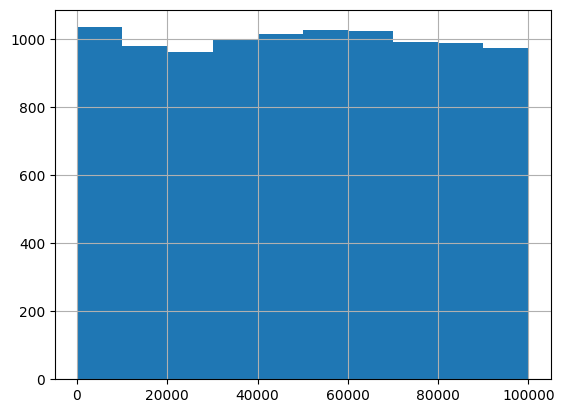

In [6]:
ParisHousingClass_df['squareMeters'].hist()

## Визуализация распределения нескольких признаков
Используется метод `hist()`

Распределение данных в ParisHousingClass


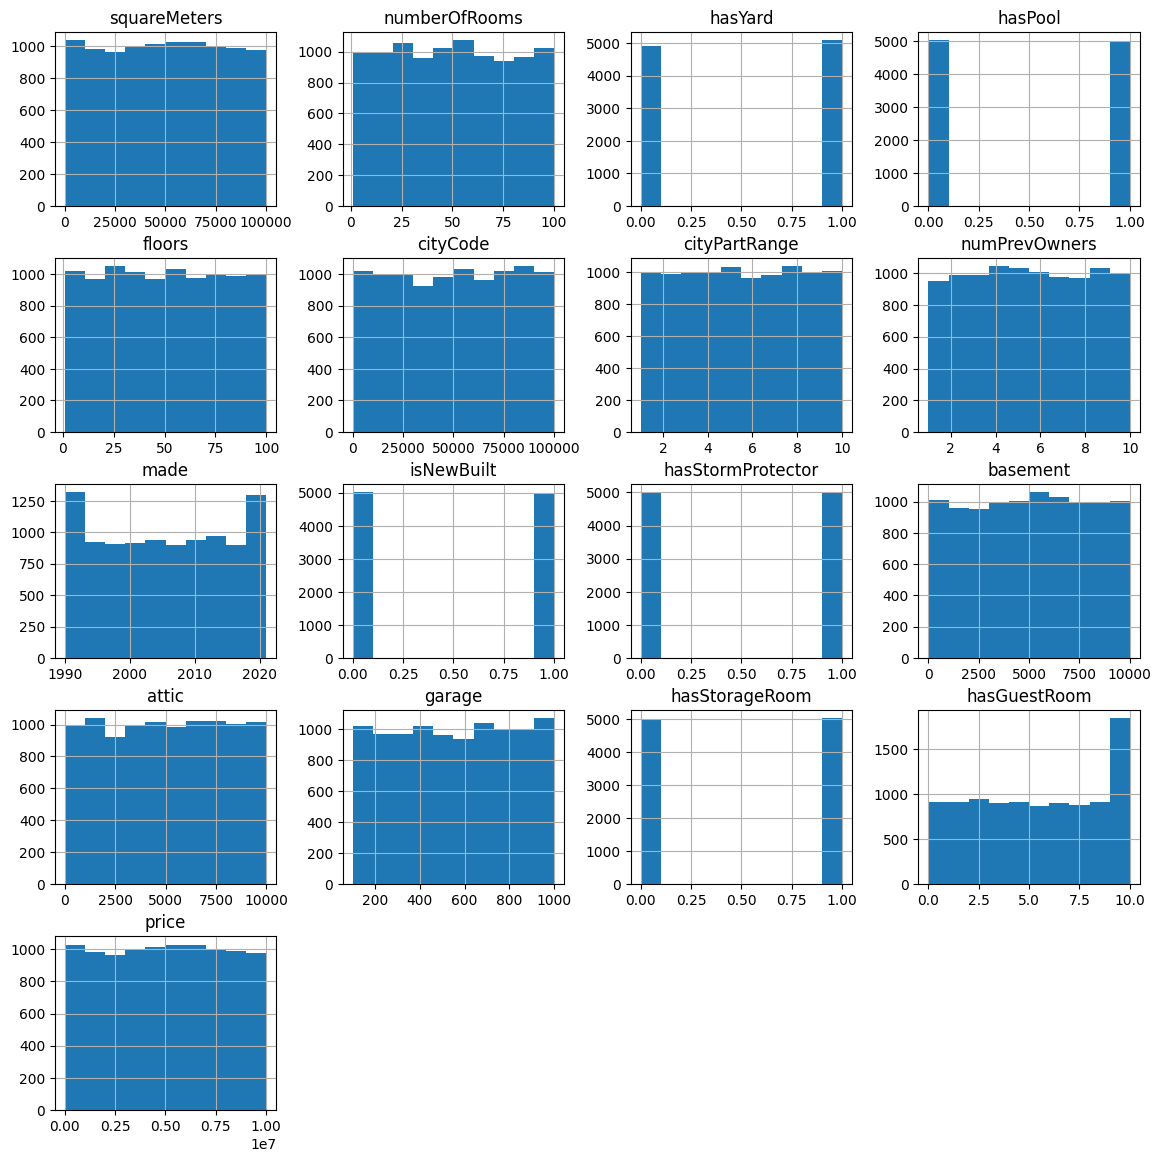

In [7]:
ParisHousingClass_df.hist(figsize=(14, 14))
print('Распределение данных в ParisHousingClass')

## Построение гистограммы с использованием matplotlib

Отобразим значения стоимости, представленные в наборе данных

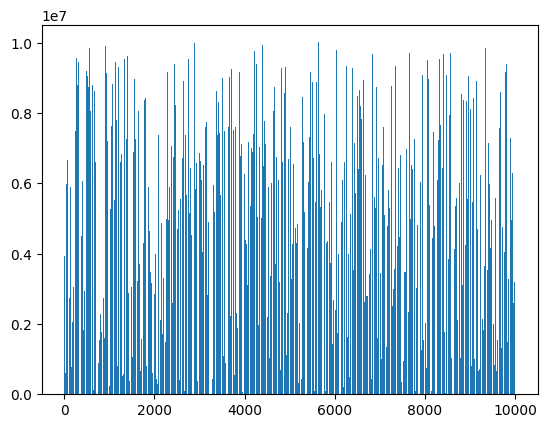

In [8]:
plt.bar(x=ParisHousingClass_df.index, height=ParisHousingClass_df['price'])
plt.show()

Представление распределения значений признака _количество предыдущих владельцев_

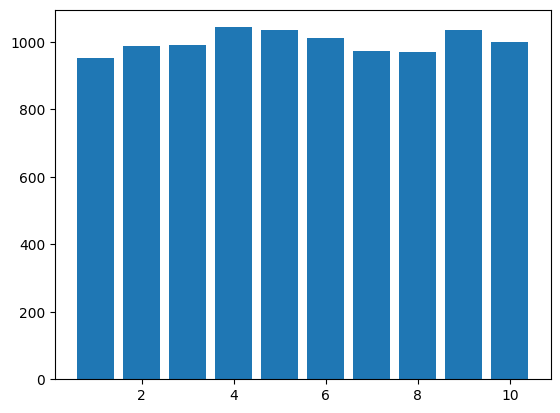

In [9]:
hist = ParisHousingClass_df['numPrevOwners'].value_counts()
plt.bar(hist.index, hist)
plt.show()

## Построение графика "ящик с усами" для признака _площадь недвижимости_

Используется метод `boxplot` библиотеки _**seaborn**_

<Axes: ylabel='squareMeters'>

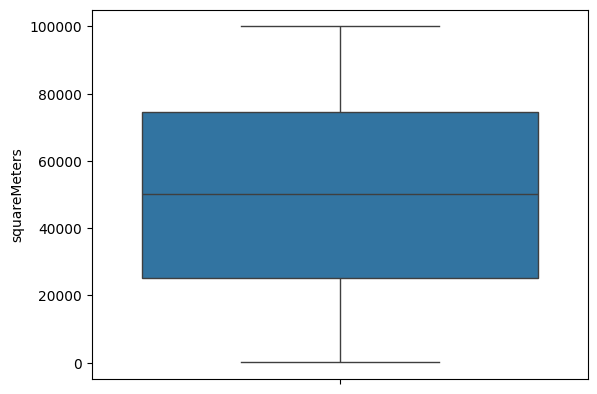

In [10]:
sns.boxplot(ParisHousingClass_df['squareMeters'])

## Использование "ящика с усами" для анализа признака _категория_

Используется метод `boxplot` библиотеки _**seaborn**_

<Axes: xlabel='squareMeters', ylabel='category'>

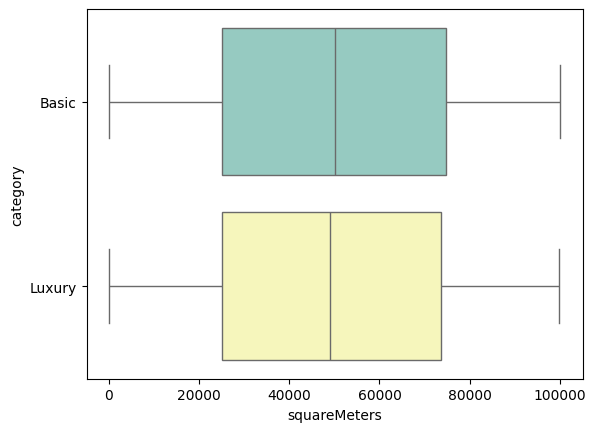

In [11]:
top_data = ParisHousingClass_df[['category', 'squareMeters']]
top_data = top_data.groupby('category').sum()
top_data = top_data.sort_values('squareMeters', ascending=False)
top_data = top_data.index.values
sns.boxplot(y='category', x='squareMeters', data=ParisHousingClass_df[ParisHousingClass_df.category.isin(top_data)], palette='Set3')

# Визуализация категориальных признаков

## Использование гистограммы для визуализации распределения признака _категория_

Используется метод `countplot` библиотеки _**seaborn**_

<Axes: xlabel='count', ylabel='category'>

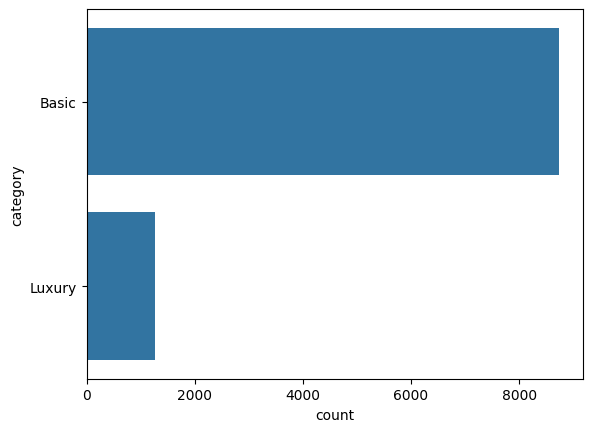

In [12]:
sns.countplot(ParisHousingClass_df['category'])

## Использование гистограммы для визуализации распределения признака _количество предыдущих владельцев_

Используется метод `countplot` библиотеки _**seaborn**_

Отображаются 5 наиболее часто встречающихся значений

<Axes: xlabel='numPrevOwners', ylabel='count'>

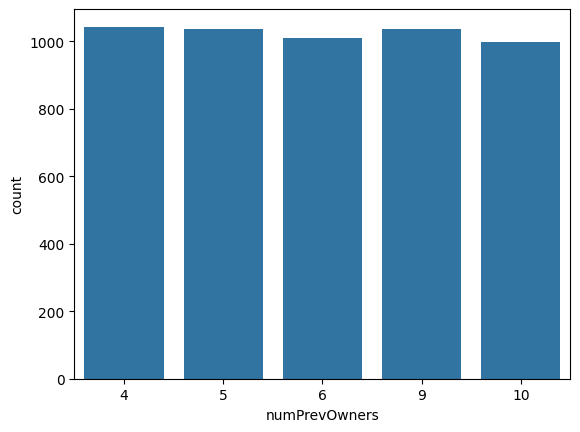

In [13]:
sns.countplot(ParisHousingClass_df[ParisHousingClass_df['numPrevOwners'].isin(ParisHousingClass_df['numPrevOwners'].value_counts().head().index)], x='numPrevOwners')

# Визуализация соотношения количественных признаков

Отбор числовых признаков, содержащих слово `room`

In [14]:
feats = [f for f in ParisHousingClass_df.columns if 'room' in f.lower()]
feats

['numberOfRooms', 'hasStorageRoom', 'hasGuestRoom']

Построение диаграмм для сравнения распределения числовых показателей

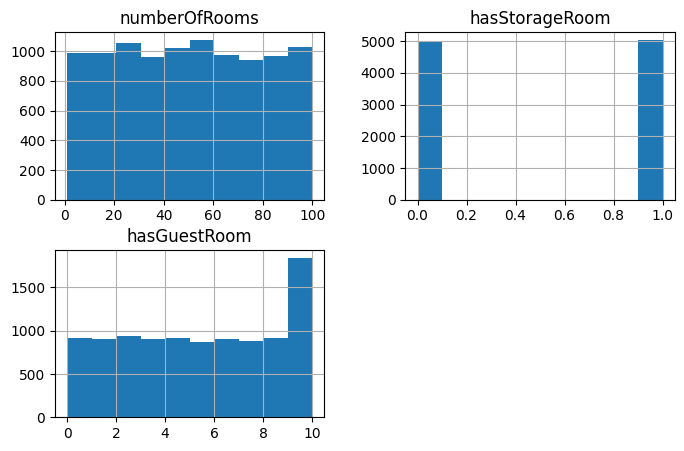

In [15]:
ParisHousingClass_df[feats].hist(figsize=(8, 5));

Попарное распределение признаков с применения _**seaborn**_

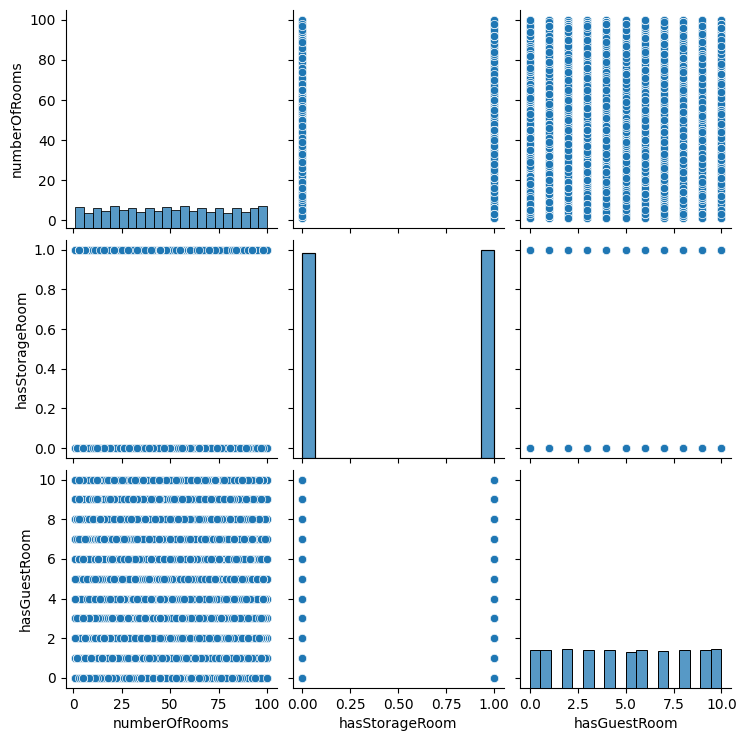

In [16]:
sns.pairplot(ParisHousingClass_df[feats]);

Попарное распределение признаков с визуализацией категорий

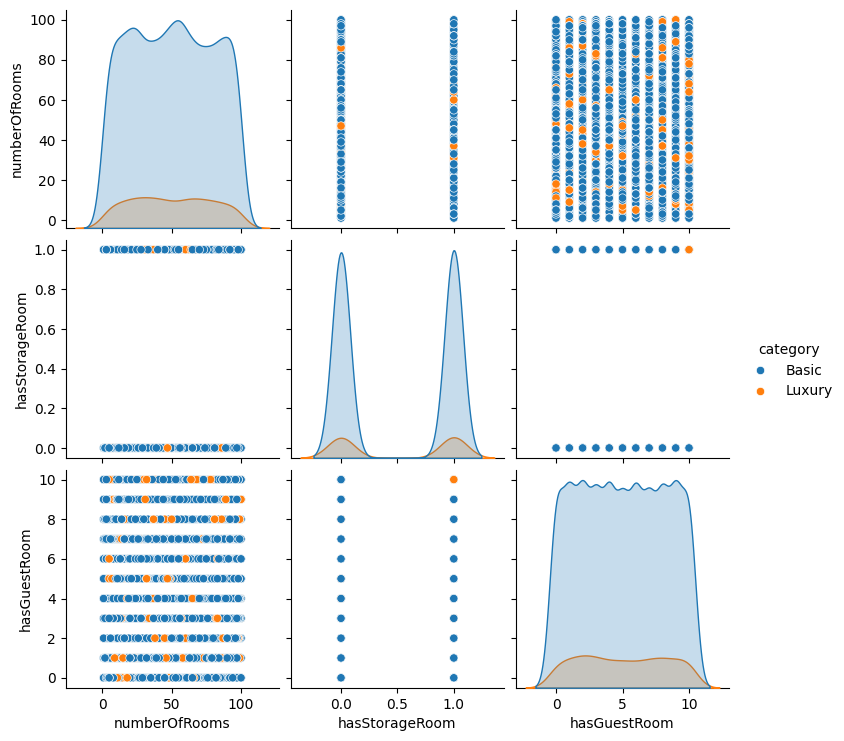

In [17]:
sns.pairplot(ParisHousingClass_df[feats + ['category']], hue='category');

Построение графика `scatter` библиотеки _**matplotlib**_

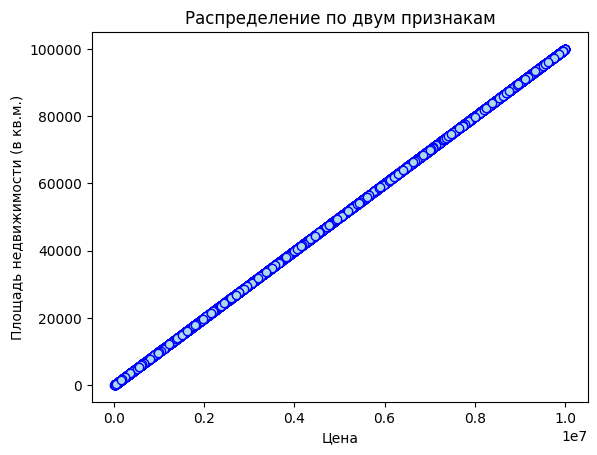

In [18]:
plt.scatter(ParisHousingClass_df['price'], ParisHousingClass_df['squareMeters'], color='lightblue', edgecolors='blue')
plt.xlabel('Цена')
plt.ylabel('Площадь недвижимости (в кв.м.)')
plt.title('Распределение по двум признакам')
plt.show()

Построение графика `scatter` библиотеки _**matplotlib**_ с настройкой цвета

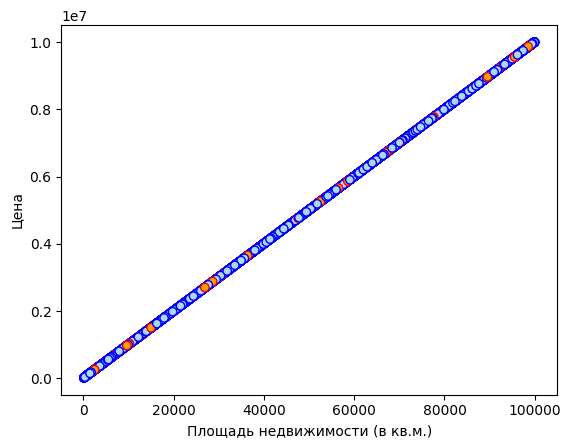

In [19]:
c = ParisHousingClass_df['category'].map({'Basic': 'lightblue', 'Luxury': 'orange'})
edge_c = ParisHousingClass_df['category'].map({'Basic': 'blue', 'Luxury': 'red'})
plt.scatter(ParisHousingClass_df['squareMeters'], ParisHousingClass_df['price'], color=c, edgecolors=edge_c)
plt.xlabel('Площадь недвижимости (в кв.м.)')
plt.ylabel('Цена')
plt.show()

Построение отдельных подмножеств с легендой

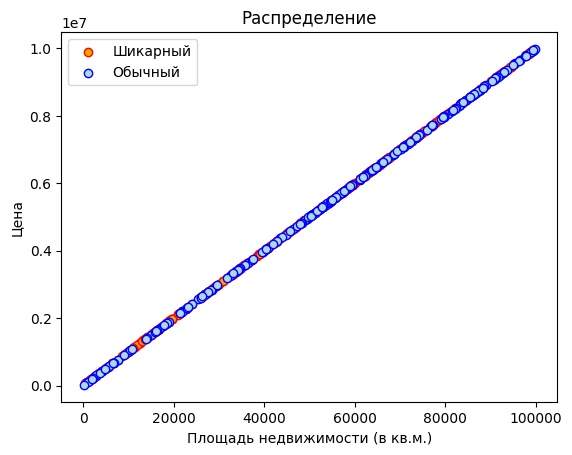

In [20]:
# Не будем отображать 10000 точек, возьмем 500 случайных из каждого класса
data_category = ParisHousingClass_df[ParisHousingClass_df['category'] == 'Luxury'].sample(250)
data_loyal = ParisHousingClass_df[ParisHousingClass_df['category'] == 'Basic'].sample(250)

plt.scatter(data_category['squareMeters'], data_category['price'], color='orange', edgecolors='red', label='Шикарный')
plt.scatter(data_loyal['squareMeters'], data_loyal['price'], color='lightblue', edgecolors='blue', label='Обычный')

plt.xlabel('Площадь недвижимости (в кв.м.)')
plt.ylabel('Цена')
plt.title('Распределение')
plt.legend()
plt.show()

Определение коррелирующих признаков набора данных

In [21]:
conv_data = ParisHousingClass_df.copy()

# Категорию надо привести к числовому типу
conv_data.category = pd.factorize(conv_data.category)[0]
conv_data.corr()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999,-0.011800
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591,-0.000442
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119,0.373987
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070,0.382995
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654,-0.003827
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539,0.003950
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813,-0.003171
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619,-0.012843
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210,0.005399
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643,0.381237


Визуализация матрицы корреляции с использованием графика типа `heatmap` библиотеки _**seaborn**_

<Axes: >

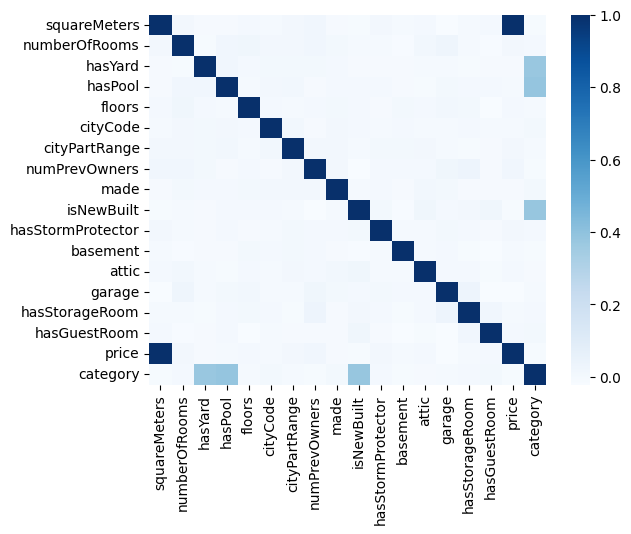

In [22]:
sns.heatmap(conv_data.corr(), cmap=plt.cm.Blues)

Как можно заметить, наибольшая корреляция наблюдается между показателями `Цена` и `Площадь недвижимости (в кв.м.)`